## ehmac DDR4 236GB Server

# 1. Libraries and imports

In [1]:
!pip3 install --upgrade numerapi
!pip3 install matplotlib_venn
!pip3 install keras-tuner --upgrade
!pip3 install numerapi --upgrade
!pip3 install plotly --upgrade
#computing libraries
!pip3 install distributed --upgrade
!pip3 install dask --upgrade
!pip3 install py4j --upgrade
!pip3 install pyspark[sql] --upgrade
!pip3 install findspark --upgrade
!pip3 install dask_yarn --upgrade
!pip3 install ray --upgrade
!pip3 install tensorboardX # for Ray lightGBM
#retreive packages and install
#numerapi for retreiving data of numerai
#pip is the mother of package retreival (pip and pip3)
!pip3 install --upgrade pip
#Tpot is the algo of algos
!pip3 install git+https://github.com/EpistasisLab/tpot@development
#xgboost is a very good algo
!pip3 install lgbm --upgrade
!pip3 install xgboost --upgrade
#!pip install pystan
#!pip install fbprophet
!pip3 install ipywidgets
!pip3 install Sklearn_pandas
!pip3 install featuretools
!pip3 install keras-tuner
!pip3 install deepgraph
#!conda install tensorflow -y
#import tensorflow as tf
!pip3 install --upgrade --ignore-installed tensorflow-gpu
!pip3 install kerastuner --upgrade
!pip3 install tensorflow --upgrade
!pip3 install tabulate --upgrade
!pip install duckdb halo
!pip3 install lightgbm --upgrade
print("All installed")

  Using cached py4j-0.10.9.5-py2.py3-none-any.whl (199 kB)
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.3
    Uninstalling py4j-0.10.9.3:
      Successfully uninstalled py4j-0.10.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyspark 3.2.1 requires py4j==0.10.9.3, but you have py4j 0.10.9.5 which is incompatible.
  Using cached py4j-0.10.9.3-py2.py3-none-any.whl (198 kB)
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.5
    Uninstalling py4j-0.10.9.5:
      Successfully uninstalled py4j-0.10.9.5
  Using cached grpcio-1.43.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.1 MB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.46.1
    Uninstalling grpcio-1.46.1:
      Successfully uninstalled grpcio-1.46.1
  Cloning https://github.com/EpistasisLab/tpot (to revision de

In [2]:
import re
from pprint import PrettyPrinter
pp = PrettyPrinter()
import timeit
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install numpy --upgrade

#import keras_tuner as kt

import tensorflow as tf
import os
import gc
from tqdm.auto import tqdm
from multiprocessing import Pool, cpu_count
import time
import requests as re
import datetime
from datetime import datetime
from datetime import datetime, date
from dateutil.relativedelta import relativedelta, FR
# data
import numerapi
from numerapi import NumerAPI
# engineer features
import featuretools as ft
from featuretools import selection
import py4j
import findspark
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import HiveContext
# General coding

import numpy as np # linear algebra
from numpy import nan
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import math
import random
from typing import List, NoReturn, Union, Tuple, Optional, Text, Generic, Callable, Dict
import joblib
import csv
import operator
import pathlib
from pathlib import Path
import json
import urllib.request
# mathematics
from scipy.stats import skew, kurtosis,spearmanr
from math import sqrt
# statistics
from scipy import stats
# visualize
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib_venn import venn2, venn3
from matplotlib.ticker import ScalarFormatter
from matplotlib import pyplot
import seaborn as sns
# Plots
#from plotly.offline import iplot
#import plotly.graph_objects as go
#import plotly.figure_factory as ff
#from plotly.subplots import make_subplots
sns.set_context("talk")
style.use('seaborn-colorblind')
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore")
# set pyspark
import py4j
import findspark
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import HiveContext
def convert_to_float16(df):
    dtypes = {}
    for col_name in df.columns.tolist():
        if col_name.startswith(('feature', 'target')):
            dtypes[col_name] = np.float16
    return df.set_index('id').astype(dtypes)
#TODO: install kerastuner

2022-05-15 20:28:08.750869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-15 20:28:08.750944: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Import libraries ML
########################################################
######## IMPORTING NECESSARY MODULES AND MODELS ########
########################################################
# Model and Sklearn tools
# Pycaret
#from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import sklearn.metrics
from sklearn.metrics import *
import sklearn.datasets
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet, RANSACRegressor, HuberRegressor, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, mean_squared_error, mean_absolute_error, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, QuantileTransformer
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit, train_test_split
from tpot import TPOTRegressor
from tpot.export_utils import expr_to_tree, generate_export_pipeline_code
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from tpot.builtins import ZeroCount
import lightgbm as lgb
from lightgbm import LGBMRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor, plot_importance # XGBoost
from lightgbm import plot_importance
import tensorflow as tf
import keras_tuner as kt # keras tuner!
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error #To evaluate our model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
#import category_encoders as ce
import timeit
#import category_encoders
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.model_selection._split import _BaseKFold, indexable, _num_samples
from sklearn.linear_model import RidgeCV, LassoLarsCV, ElasticNetCV
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import FeatureAgglomeration
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV,  cross_val_score
from sklearn.metrics import mean_squared_error
print("imports completed")

imports completed


# 2. Config
A simple config and logging setup.

In [4]:
#today = datetime.now().strftime('%Y-%m-%d')
today = '2021'
napi = numerapi.NumerAPI(verbosity="info")
current_ds = napi.get_current_round()
print('Current round: ',current_ds)

Current round:  316


In [5]:
# config class
class CFG:
    """
    Set FETCH_VIA_API = True if you want to fetch the data via API.
    Otherwise we use the daily-updated one in the kaggle dataset (faster).
    """
    DEBUG = True # debug option
    TUNING = True # whether to use the KerasTuner or not
    LOAD = True
    INPUT_DIR = 'Signals/'+str(current_ds)  #'../input/yfinance-stock-price-data-for-numerai-signals'
    OUTPUT_DIR = './'
    FETCH_VIA_API = False
    SEED = 46
    TARGET = 'target'   

In [6]:
# Logging is always nice for your experiment:)
def init_logger(log_file='train.log'):
    from logging import getLogger, INFO, FileHandler,  Formatter,  StreamHandler
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = init_logger(log_file=f'{CFG.OUTPUT_DIR}/{today}.log')
logger.info('Start Logging...')

Start Logging...
INFO:__main__:Start Logging...


## 2.1 Setup Numerai API
First of all, let's set up the numerai signals API. 

We can do many things with this API: 

- get a ticker map (between yfinance data and numerai historical targets)
- get the historical targets
- get your model slot name and model_id (if private key and secret key are provided)
- submit

(well, maybe more)

# 3 Load Data
Get the eligible tickers from Numerai Signals API

Get the stock price data, fetched via the [YFiance API](https://pypi.org/project/yfinance/).

The good thing with this API is that it is free of charge.

The bad thing with this API is that the data is often not complete.

For a better quality of stock price data, you might want to try out purchasing one from [Quandl](https://www.quandl.com/data/EOD-End-of-Day-US-Stock-Prices/documentation?anchor=overview).

This is another starter using Quandl data:
https://forum.numer.ai/t/signals-plugging-in-the-data-from-quandl/2431

This is of course wonderful, but if you are a beginner, why not just start with a free one?

In [7]:
ERA_COL = "era"
TARGET_COL = "target"
#spinner = Halo(text='', spinner='dots')

MODEL_FOLDER = "models"
MODEL_CONFIGS_FOLDER = "model_configs"
PREDICTION_FILES_FOLDER = "prediction_files"


def save_model(model, name):
    try:
        Path(MODEL_FOLDER).mkdir(exist_ok=True, parents=True)
    except Exception as ex:
        pass
    pd.to_pickle(model, f"{MODEL_FOLDER}/{name}.pkl")


def load_model(name):
    path = Path(f"{MODEL_FOLDER}/{name}.pkl")
    if path.is_file():
        model = pd.read_pickle(f"{MODEL_FOLDER}/{name}.pkl")
    else:
        model = False
    return model


def save_model_config(model_config, model_name):
    try:
        Path(MODEL_CONFIGS_FOLDER).mkdir(exist_ok=True, parents=True)
    except Exception as ex:
        pass
    with open(f"{MODEL_CONFIGS_FOLDER}/{model_name}.json", 'w') as fp:
        json.dump(model_config, fp)


def load_model_config(model_name):
    path_str = f"{MODEL_CONFIGS_FOLDER}/{model_name}.json"
    path = Path(path_str)
    if path.is_file():
        with open(path_str, 'r') as fp:
            model_config = json.load(fp)
    else:
        model_config = False
    return model_config


def get_biggest_change_features(corrs, n):
    all_eras = corrs.index.sort_values()
    h1_eras = all_eras[:len(all_eras) // 2]
    h2_eras = all_eras[len(all_eras) // 2:]

    h1_corr_means = corrs.loc[h1_eras, :].mean()
    h2_corr_means = corrs.loc[h2_eras, :].mean()

    corr_diffs = h2_corr_means - h1_corr_means
    worst_n = corr_diffs.abs().sort_values(ascending=False).head(n).index.tolist()
    return worst_n


def get_time_series_cross_val_splits(data, cv = 3, embargo = 12):
    all_train_eras = data[ERA_COL].unique()
    len_split = len(all_train_eras) // cv
    test_splits = [all_train_eras[i * len_split:(i + 1) * len_split] for i in range(cv)]
    # fix the last test split to have all the last eras, in case the number of eras wasn't divisible by cv
    test_splits[-1] = np.append(test_splits[-1], all_train_eras[-1])

    train_splits = []
    for test_split in test_splits:
        test_split_max = int(np.max(test_split))
        test_split_min = int(np.min(test_split))
        # get all of the eras that aren't in the test split
        train_split_not_embargoed = [e for e in all_train_eras if not (test_split_min <= int(e) <= test_split_max)]
        # embargo the train split so we have no leakage.
        # one era is length 5, so we need to embargo by target_length/5 eras.
        # To be consistent for all targets, let's embargo everything by 60/5 == 12 eras.
        train_split = [e for e in train_split_not_embargoed if
                       abs(int(e) - test_split_max) > embargo and abs(int(e) - test_split_min) > embargo]
        train_splits.append(train_split)

    # convenient way to iterate over train and test splits
    train_test_zip = zip(train_splits, test_splits)
    return train_test_zip


def neutralize(df,
               columns,
               neutralizers=None,
               proportion=1.0,
               normalize=True,
               era_col="era"):
    if neutralizers is None:
        neutralizers = []
    unique_eras = df[era_col].unique()
    computed = []
    for u in unique_eras:
        df_era = df[df[era_col] == u]
        scores = df_era[columns].values
        if normalize:
            scores2 = []
            for x in scores.T:
                x = (scipy.stats.rankdata(x, method='ordinal') - .5) / len(x)
                x = scipy.stats.norm.ppf(x)
                scores2.append(x)
            scores = np.array(scores2).T
        exposures = df_era[neutralizers].values

        scores -= proportion * exposures.dot(
            np.linalg.pinv(exposures.astype(np.float32)).dot(scores.astype(np.float32)))

        scores /= scores.std(ddof=0)

        computed.append(scores)

    return pd.DataFrame(np.concatenate(computed),
                        columns=columns,
                        index=df.index)


def neutralize_series(series, by, proportion=1.0):
    scores = series.values.reshape(-1, 1)
    exposures = by.values.reshape(-1, 1)

    # this line makes series neutral to a constant column so that it's centered and for sure gets corr 0 with exposures
    exposures = np.hstack(
        (exposures,
         np.array([np.mean(series)] * len(exposures)).reshape(-1, 1)))

    correction = proportion * (exposures.dot(
        np.linalg.lstsq(exposures, scores, rcond=None)[0]))
    corrected_scores = scores - correction
    neutralized = pd.Series(corrected_scores.ravel(), index=series.index)
    return neutralized


def unif(df):
    x = (df.rank(method="first") - 0.5) / len(df)
    return pd.Series(x, index=df.index)


def get_feature_neutral_mean(df, prediction_col):
    feature_cols = [c for c in df.columns if c.startswith("feature")]
    df.loc[:, "neutral_sub"] = neutralize(df, [prediction_col],
                                          feature_cols)[prediction_col]
    scores = df.groupby("era").apply(
        lambda x: (unif(x["neutral_sub"]).corr(x[TARGET_COL]))).mean()
    return np.mean(scores)


def fast_score_by_date(df, columns, target, tb=None, era_col="era"):
    unique_eras = df[era_col].unique()
    computed = []
    for u in unique_eras:
        df_era = df[df[era_col] == u]
        era_pred = np.float64(df_era[columns].values.T)
        era_target = np.float64(df_era[target].values.T)

        if tb is None:
            ccs = np.corrcoef(era_target, era_pred)[0, 1:]
        else:
            tbidx = np.argsort(era_pred, axis=1)
            tbidx = np.concatenate([tbidx[:, :tb], tbidx[:, -tb:]], axis=1)
            ccs = [np.corrcoef(era_target[tmpidx], tmppred[tmpidx])[0, 1] for tmpidx, tmppred in zip(tbidx, era_pred)]
            ccs = np.array(ccs)

        computed.append(ccs)

    return pd.DataFrame(np.array(computed), columns=columns, index=df[era_col].unique())


def validation_metrics(validation_data, pred_cols, example_col, fast_mode=False):
    validation_stats = pd.DataFrame()
    feature_cols = [c for c in validation_data if c.startswith("feature_")]
    for pred_col in pred_cols:
        # Check the per-era correlations on the validation set (out of sample)
        validation_correlations = validation_data.groupby(ERA_COL).apply(
            lambda d: unif(d[pred_col]).corr(d[TARGET_COL]))

        mean = validation_correlations.mean()
        std = validation_correlations.std(ddof=0)
        sharpe = mean / std

        validation_stats.loc["mean", pred_col] = mean
        validation_stats.loc["std", pred_col] = std
        validation_stats.loc["sharpe", pred_col] = sharpe

        rolling_max = (validation_correlations + 1).cumprod().rolling(window=9000,  # arbitrarily large
                                                                      min_periods=1).max()
        daily_value = (validation_correlations + 1).cumprod()
        max_drawdown = -((rolling_max - daily_value) / rolling_max).max()
        validation_stats.loc["max_drawdown", pred_col] = max_drawdown

        payout_scores = validation_correlations.clip(-0.25, 0.25)
        payout_daily_value = (payout_scores + 1).cumprod()

        apy = (
            (
                (payout_daily_value.dropna().iloc[-1])
                ** (1 / len(payout_scores))
            )
            ** 49  # 52 weeks of compounding minus 3 for stake compounding lag
            - 1
        ) * 100

        validation_stats.loc["apy", pred_col] = apy

        if not fast_mode:
            # Check the feature exposure of your validation predictions
            max_per_era = validation_data.groupby(ERA_COL).apply(
                lambda d: d[feature_cols].corrwith(d[pred_col]).abs().max())
            max_feature_exposure = max_per_era.mean()
            validation_stats.loc["max_feature_exposure", pred_col] = max_feature_exposure

            # Check feature neutral mean
            feature_neutral_mean = get_feature_neutral_mean(validation_data, pred_col)
            validation_stats.loc["feature_neutral_mean", pred_col] = feature_neutral_mean

            # Check top and bottom 200 metrics (TB200)
            tb200_validation_correlations = fast_score_by_date(
                validation_data,
                [pred_col],
                TARGET_COL,
                tb=200,
                era_col=ERA_COL
            )

            tb200_mean = tb200_validation_correlations.mean()[pred_col]
            tb200_std = tb200_validation_correlations.std(ddof=0)[pred_col]
            tb200_sharpe = tb200_mean / tb200_std

            validation_stats.loc["tb200_mean", pred_col] = tb200_mean
            validation_stats.loc["tb200_std", pred_col] = tb200_std
            validation_stats.loc["tb200_sharpe", pred_col] = tb200_sharpe

        # MMC over validation
        mmc_scores = []
        corr_scores = []
        for _, x in validation_data.groupby(ERA_COL):
            series = neutralize_series(unif(x[pred_col]), (x[example_col]))
            mmc_scores.append(np.cov(series, x[TARGET_COL])[0, 1] / (0.29 ** 2))
            corr_scores.append(unif(x[pred_col]).corr(x[TARGET_COL]))

        val_mmc_mean = np.mean(mmc_scores)
        val_mmc_std = np.std(mmc_scores)
        corr_plus_mmcs = [c + m for c, m in zip(corr_scores, mmc_scores)]
        corr_plus_mmc_sharpe = np.mean(corr_plus_mmcs) / np.std(corr_plus_mmcs)

        validation_stats.loc["mmc_mean", pred_col] = val_mmc_mean
        validation_stats.loc["corr_plus_mmc_sharpe", pred_col] = corr_plus_mmc_sharpe

        # Check correlation with example predictions
        per_era_corrs = validation_data.groupby(ERA_COL).apply(lambda d: unif(d[pred_col]).corr(unif(d[example_col])))
        corr_with_example_preds = per_era_corrs.mean()
        validation_stats.loc["corr_with_example_preds", pred_col] = corr_with_example_preds

    # .transpose so that stats are columns and the model_name is the row
    return validation_stats.transpose()


def download_data(napi, filename, dest_path):
    spinner.start(f'Downloading {dest_path}')
    napi.download_dataset(filename, dest_path)
    spinner.succeed()
    
# function to get training samples
def get_training_data():
    # extract training samples
    df_train = df_model.loc[id]
    
    # split SalePrice and features
    y = df_train.target
    X = df_train.drop('target',axis=1)
    
    return X, y

# extract test data (without SalePrice)
def get_test_data():
    return df_model.loc[id_test].drop('target',axis=1)

In [8]:
current_round = napi.get_current_round(tournament=8)
current_ds = napi.get_current_round(tournament=8)
print(current_ds)

316


In [9]:
%%time
#Download the Numerai files
datasets = [('numerai_training_data_int8.parquet', 'numerai_training_data.parquet'),
            ('numerai_tournament_data_int8.parquet', 'numerai_tournament_data.parquet'),
            ('numerai_validation_data_int8.parquet', 'numerai_validation_data.parquet'),
            ('numerai_live_data_int8.parquet', 'live_data.parquet'),
            ('example_validation_predictions.parquet', 'example_validation_predictions.parquet'),
           ]
# Download datasets
for dataset in datasets:
    napi.download_dataset(*dataset)
# DDR4: 10min

numerai_training_data.parquet: 1.01GB [04:46, 3.53MB/s]                         
numerai_tournament_data.parquet: 582MB [02:27, 3.95MB/s]                        
numerai_validation_data.parquet: 228MB [00:57, 3.93MB/s]                        
live_data.parquet: 3.12MB [00:01, 2.18MB/s]                                     
example_validation_predictions.parquet: 13.0MB [00:03, 3.29MB/s]                

CPU times: user 58.2 s, sys: 18.8 s, total: 1min 16s
Wall time: 8min 22s


In [10]:
%%time
train = pd.read_parquet('numerai_training_data.parquet')
test = pd.read_parquet('numerai_tournament_data.parquet')
val = pd.read_parquet('numerai_validation_data.parquet')
print(test.shape)

(1412847, 1073)
CPU times: user 37.6 s, sys: 38.5 s, total: 1min 16s
Wall time: 1min 6s


In [11]:
%%time
import datetime
print("Current date and time: ",str(datetime.datetime.now()))
#memory usages
train.info(memory_usage='deep')
test.info(memory_usage='deep')
val.info(memory_usage='deep')
nonfeat = ['data_type','target','target_nomi_20','target_nomi_60','target_jerome_20','target_jerome_60','target_janet_20','target_janet_60','target_ben_20','target_ben_60','target_alan_20','target_alan_60','target_paul_20','target_paul_60','target_george_20','target_george_60','target_william_20','target_william_60','target_arthur_20','target_arthur_60','target_thomas_20','target_thomas_60']
features = test.columns.drop(nonfeat)
targets = ['target','target_nomi_20','target_nomi_60','target_jerome_20','target_jerome_60','target_janet_20','target_janet_60','target_ben_20','target_ben_60','target_alan_20','target_alan_60','target_paul_20','target_paul_60','target_george_20','target_george_60','target_william_20','target_william_60','target_arthur_20','target_arthur_60','target_thomas_20','target_thomas_60']
print(features)

Current date and time:  2022-05-15 20:37:59.157365
<class 'pandas.core.frame.DataFrame'>
Index: 2412105 entries, n003bba8a98662e4 to nfff2bd38e397265
Columns: 1073 entries, era to target_thomas_60
dtypes: float32(21), int8(1050), object(2)
memory usage: 3.0 GB
<class 'pandas.core.frame.DataFrame'>
Index: 1412847 entries, n000101811a8a843 to nffffd8ce323ec2a
Columns: 1073 entries, era to target_thomas_60
dtypes: float64(21), int8(1050), object(2)
memory usage: 1.9 GB
<class 'pandas.core.frame.DataFrame'>
Index: 539658 entries, n000777698096000 to nffe714f0da4d819
Columns: 1073 entries, era to target_thomas_60
dtypes: float32(21), int8(1050), object(2)
memory usage: 687.1 MB
Index(['era', 'feature_dichasial_hammier_spawner',
       'feature_rheumy_epistemic_prancer', 'feature_pert_performative_hormuz',
       'feature_hillier_unpitied_theobromine',
       'feature_perigean_bewitching_thruster',
       'feature_renegade_undomestic_milord', 'feature_koranic_rude_corf',
       'feature_demi

In [12]:
%%time
#11.5gb memory in use
# features
#print(train.columns)
train = train.rename(columns={'era':'feature_era'})
test = test.rename(columns={'era':'feature_era'})
val = val.rename(columns={'era':'feature_era'})
#feature_cols = train.columns[train.columns.str.startswith('feature')]
#features = [f for f in train.columns.values.tolist() if '_' in f]
print('There are {} features.'.format(len(features)))
#print(features)

There are 1051 features.
CPU times: user 1.49 s, sys: 3 s, total: 4.49 s
Wall time: 4.04 s


In [13]:
print(test.data_type.unique())

['test' 'live']


## 3.2 Load Stock Price

## 3.3 Load Stock listing Data

In [14]:
print(train.shape)
train.head(3)
train.tail(3)

(2412105, 1073)


,feature_era,data_type,feature_dichasial_hammier_spawner,feature_rheumy_epistemic_prancer,feature_pert_performative_hormuz,feature_hillier_unpitied_theobromine,feature_perigean_bewitching_thruster,feature_renegade_undomestic_milord,feature_koranic_rude_corf,feature_demisable_expiring_millepede,...,target_paul_20,target_paul_60,target_george_20,target_george_60,target_william_20,target_william_60,target_arthur_20,target_arthur_60,target_thomas_20,target_thomas_60
id,,,,,,,,,,,,,,,,,,,,,
nffde3b371d67394,0574,train,1,1,2,1,3,3,3,1,...,0.25,0.50,0.50,0.50,0.333333,0.666667,0.333333,0.500000,0.333333,0.666667
nfff1a1111b35e84,0574,train,4,3,2,2,3,2,1,2,...,0.75,0.75,0.75,0.75,0.666667,0.666667,0.500000,0.500000,0.500000,0.500000
nfff2bd38e397265,0574,train,1,1,3,0,2,2,4,4,...,0.50,0.75,0.50,0.75,0.666667,0.833333,0.666667,0.833333,0.833333,1.000000


# 4. Prepare data

## 4.1 Merge stock price and listing data

In [15]:
#TODO: recognize which stocks the data is for

In [16]:
#TODO: Load targets


In [17]:
import glob
from tqdm.auto import tqdm
import pyarrow.parquet as pq
EXAMPLE_PREDS_COL = "example_preds"
TARGET_COL = "target"
ERA_COL = "era"

train_pq_path = "numerai_training_data.parquet"
tournament_pq_path = "numerai_tournament_data.parquet"
valid_pq_path = "numerai_validation_data.parquet"
valid_preds_pq_path = "example_validation_predictions.parquet"
train_pq = pq.ParquetFile(train_pq_path)
tournament_pq = pq.ParquetFile(tournament_pq_path)
valid_pq = pq.ParquetFile(valid_pq_path)

In [18]:
col_names = train_pq.schema.names
feature_cols = [col for col in col_names if "feature" in col]
target_cols = [col for col in col_names if "target" in col]


In [19]:
class PandasDriver:
    def __init__(self, pq_path: str, splits=4):
        self.pq_path = pq_path
        self.splits = splits
        
        self.df = pd.read_parquet(pq_path)
        self.df['era'] = self.df['era'].astype('int')
    
    def get_by_group(self, group_id: int, cols=None):
        if group_id == self.splits:
            group_id = 0
        return self.df[self.df['era'] % self.splits == group_id]


import duckdb

class DuckDBDriver:
    def __init__(self, pq_path: str, splits=4):
        self.pq_path = pq_path
        self.splits = splits
        self.conn = duckdb.connect(":memory:")
        
    def _gen_select_statement(self) -> str:
        return f"SELECT * FROM parquet_scan('{self.pq_path}') "
    
    def _query(self, expression: str):
        return self. conn.execute(expression)
    
    def _fetch(self, ret_query, fetch_type, cols):
        if fetch_type == "pandas":
            return ret_query.fetchdf()
        elif fetch_type == "numpy":
            return ret_query.fetchdf()[cols].values
        
    def get_by_era(self, era: str, cols=None, fetch_type="pandas"):
        expression = self._gen_select_statement()
        expression += f"WHERE era = '{era}'"
        ret_query = self._query(expression)
        return self._fetch(ret_query, fetch_type, cols)
    
    def get_by_group(self, group_id: int, cols=None, fetch_type="pandas"):
        if group_id == self.splits:
            group_id = 0
        expression = self._gen_select_statement()
        expression += f"WHERE CAST(era AS INT) % {self.splits} = {group_id}"
        ret_query = self._query(expression)
        return self._fetch(ret_query, fetch_type, cols)

In [20]:
#driver = DuckDBDriver(train_pq_path)
driver = PandasDriver(train_pq_path)

In [21]:
df = driver.get_by_group(1)

In [22]:
era = df['era'].unique()#[:10]

<h1> Exploratory Data Analysis </h1>

In [23]:
"""
# there are train and validation...
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax = ax.flatten()

for i, data_type in enumerate(['train', 'validation']):
    # slice
    targets_ = targets.query(f'data_type == "{data_type}"')
    logger.info('*' * 50)
    logger.info('{} target: {:,} tickers (friday_date: {} - {})'.format(
        data_type, 
        targets_['ticker'].nunique(),
        targets_['friday_date'].min(),
        targets_['friday_date'].max(),
    ))
    
    # plot target
    ax[i].hist(targets_['target'])
    ax[i].set_title(f'{data_type}')"""
print(df.head(3))

                  era data_type  feature_dichasial_hammier_spawner  \
id                                                                   
n003bba8a98662e4    1     train                                  4   
n003bee128c2fcfc    1     train                                  2   
n0048ac83aff7194    1     train                                  2   

                  feature_rheumy_epistemic_prancer  \
id                                                   
n003bba8a98662e4                                 2   
n003bee128c2fcfc                                 4   
n0048ac83aff7194                                 1   

                  feature_pert_performative_hormuz  \
id                                                   
n003bba8a98662e4                                 4   
n003bee128c2fcfc                                 1   
n0048ac83aff7194                                 3   

                  feature_hillier_unpitied_theobromine  \
id                                               

The target looks exactly like the one from the Numerai Tournament, where both features and targets are given to the participants.

Also note that the train-validation split is based on time (i.e., Time-Series Split):

- train friday_date: 20030131 - 20121228
- validation friday_date: 20130104 - 20200228

In [24]:
# Check if GPU is available (visual)
#!nvidia-smi

Here I only use our stock price data which have ticker overlaps such that we can build a supervised machine learning model.

In [25]:
%%time
#record_per_era = df.groupby['era'].nunique().reset_index().sort_values(by='era')
#record_per_era

CPU times: user 7 µs, sys: 5 µs, total: 12 µs
Wall time: 24.1 µs


In [26]:
#record_per_era['era'].hist()
#print(record_per_era['era'].describe())

There are unfortunately some tickers where the number of records is small. 

Here I only use tickers with more than 1,000 records.

In [27]:
"""
pp(record_per_era.datetime.head())
record_per_era.datetime = record_per_era.datetime.to_string
pp(record_per_era.datetime.head())
eras_with_records = record_per_era.query('datetime >= 24')['era'].values
df = df.loc[df['era'].isin(eras_with_records)].reset_index(drop=True)

print('Here, we use {:,} eras: {:,} records'.format(df['era'].nunique(), len(df)))
"""

"\npp(record_per_era.datetime.head())\nrecord_per_era.datetime = record_per_era.datetime.to_string\npp(record_per_era.datetime.head())\neras_with_records = record_per_era.query('datetime >= 24')['era'].values\ndf = df.loc[df['era'].isin(eras_with_records)].reset_index(drop=True)\n\nprint('Here, we use {:,} eras: {:,} records'.format(df['era'].nunique(), len(df)))\n"

# Feature Engineering
Yeah finally machine learning part!

Here we generate sets of stock price features. There are some caveats to be aware of:

- **No Leak**: we cannot use a feature which uses the future information (this is a forecasting task!)
- **Stationaly features**: Our features have to work whenever (scales must be stationaly over the periods of time)

The implementation of the feature engineering is derived from [J-Quants Tournament](https://japanexchangegroup.github.io/J-Quants-Tutorial/#anchor-2.7). Although this content is in Japanese, I believe this is one of the best resources for feature engineering in the finance domain. 

Also I add the RSI and MACD features as a bonus:D

We generate features per ticker repeatedly. To accelerate the process, we use the parallel processing.

## feature engineering for Pandas

In [28]:
# TODO: use pyspark (for use of GPU resource)
# technical indicators
#TODO add the log and higher orders
# TODO multithreading


#df=[]
def RSI(close: pd.DataFrame, period: int = 13) -> pd.Series:
    # https://gist.github.com/jmoz/1f93b264650376131ed65875782df386
    """See source https://github.com/peerchemist/finta
    and fix https://www.tradingview.com/wiki/Talk:Relative_Strength_Index_(RSI)
    Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements.
    RSI oscillates between zero and 100. Traditionally, and according to Wilder, RSI is considered overbought when above 70 and oversold when below 30.
    Signals can also be generated by looking for divergences, failure swings and centerline crossovers.
    RSI can also be used to identify the general trend."""

    delta = close.diff()

    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    _gain = up.ewm(com=(period - 1), min_periods=period).mean()
    _loss = down.abs().ewm(com=(period - 1), min_periods=period).mean()

    RS = _gain / _loss
    return pd.Series(100 - (100 / (1 + RS)))

def EMA1(x, n):
    """
    https://qiita.com/MuAuan/items/b08616a841be25d29817
    """
    a= 2/(n+1)
    return pd.Series(x).ewm(alpha=a).mean()

def MACD(close : pd.DataFrame, span1=10, span2=24, span3=8):
    """
    Compute MACD
    # https://www.learnpythonwithrune.org/pandas-calculate-the-moving-average-convergence-divergence-macd-for-a-stock/
    """
    exp1 = EMA1(close, span1)
    exp2 = EMA1(close, span2)
    macd = exp1 - exp2
    signal = EMA1(macd, span3)

    return macd, signal


def POW(x, n):
    """
    Return Exponential power of series and other, element-wise (binary operator pow).
    # https://pandas.pydata.org/docs/reference/api/pandas.Series.pow.html
    """

    return pd.Series(x).pow(n, fill_value=0)

def STD(x):
    """

    # https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html
    """

    return pd.Series(x).std()

def SKEW(x):
    """

    # https://pandas.pydata.org/docs/reference/api/pandas.Series.skew.html
    """

    return pd.Series(x).skew()


#@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def feature_engineering(era=1, df=df):
    """
    feature engineering
    
    :INPUTS:
    - ticker : numerai ticker name (str)
    - df : yfinance dataframe (pd.DataFrame)
    
    :OUTPUTS:
    - feature_df : feature engineered dataframe (pd.DataFrame)
    """
    # init
    keys = ['id', 'feature_']
    fdf = df.query(f'feature_ == "{feature_}"')
    
    # price features
    new_feats = []    
    
    # Standard Deviation
    fdf['STD'] = STD(fdf['era'])   
        
    # Volume standard deviation
    fdf['VSTD'] = STD(fdf['id'])   
    
    # Skew
    fdf['SKEW'] = SKEW(fdf['era'])   
    
    # Volume Skew
    fdf['VSKEW'] = SKEW(fdf['id']) 
    
    """
    Create features by calculating statistical moments for each group.

    :param df: Pandas DataFrame containing all features
    """
    for group in ["re_a","re_b","re_c","re_d","re_e","re_f","re_g","re_h","re_i","re_j","re_k","re_l","re_m","re_n","re_o","re_p","re_q","re_r","re_s", "re_t", "re_u", "re_v", "re_w", "re_x","re_y","re_z","_a","_b","_c","_d","_e","_f","_g","_h","_i","_j","_k","_l","_m","_n","_o","_p","_q","_r","_s","_t","_u","_v","_w","_x","_y","_z"]:
        cols = [col for col in fdf.columns if group in col]
        fdf[f"f_{group}_mean"] = fdf[cols].mean(axis=1)
        fdf[f"f_{group}_median"] = fdf[cols].median(axis=1)
        #df[f"feature_{group}_mad"] = df[cols].mad(axis=1)
        #df[f"feature_{group}_product"] = df[cols].product(axis=1)
        fdf[f"f_{group}_std"] = fdf[cols].std(axis=1)
        #df[f"feature_{group}_var"] = df[cols].var(axis=1)          
        fdf[f"f_{group}_skew"] = fdf[cols].skew(axis=1)
        fdf[f"f_{group}_sum"] = fdf[cols].sum(axis=1)
        #fdf[f"feature_{group}_kurt"] = fdf[cols].kurt(axis=1)
        fdf[f"f_{group}_pow2"] = fdf[cols].pow(2,axis=1)
        #fdf[f"feature_{group}_min"] = fdf[cols].min(axis=1) 
        #df[f"feature_{group}_max"] = df[cols].max(axis=1)
    return fdf
    
    new_feats2 += ['STD','VSTD','SKEW','VSKEW',
                  #Group _mean
                 "f_re_a_mean","f_re_b_mean","f_re_c_mean","f_re_d_mean","f_re_e_mean","f_re_f_mean","f_re_g_mean","f_re_h_mean","f_re_i_mean",
                 "f_re_j_mean","f_re_k_mean","f_re_l_mean","f_re_m_mean","f_re_n_mean","f_re_o_mean","f_re_p_mean","f_re_q_mean","f_re_r_mean",
                 "f_re_s_mean","f_re_t_mean","f_re_u_mean","f_re_v_mean","f_re_w_mean","f_re_x_mean","f_re_y_mean","f_re_z_mean", 
                 "f__a_mean","f__b_mean","f__c_mean","f__d_mean","f__e_mean","f__f_mean","f__g_mean","f__h_mean","f__i_mean","f__j_mean","f__k_mean","f__l_mean",
                 "f__m_mean","f__n_mean","f__o_mean","f__p_mean","f__q_mean","f__r_mean","f__s_mean","f__t_mean","f__u_mean","f__v_mean","f__w_mean","f__x_mean","f__y_mean","f__z_mean",                   
                  #Group _median
                 "f_re_a_median","f_re_b_median","f_re_c_median","f_re_d_median","f_re_e_median","f_re_f_median","f_re_g_median","f_re_h_median","f_re_i_median",
                 "f_re_j_median","f_re_k_median","f_re_l_median","f_re_m_median","f_re_n_median","f_re_o_median","f_re_p_median","f_re_q_median","f_re_r_median",
                 "f_re_s_median","f_re_t_median","f_re_u_median","f_re_v_median", "f_re_w_median","f_re_x_median","f_re_y_median","f_re_z_median", 
                 "f__a_median","f__b_median","f__c_median","f__d_median","f__e_median","f__f_median","f__g_median","f__h_median","f__i_median","f__j_median","f__k_median","f__l_median",
                 "f__m_median","f__n_median","f__o_median","f__p_median","f__q_median","f__r_median","f__s_median","f__t_median","f__u_median","f__v_median","f__w_median","f__x_median","f__y_median","f__z_median",
                  #Group _std
                 "f_re_a_std","f_re_b_std","f_re_c_std","f_re_d_std","f_re_e_std","f_re_f_std","f_re_g_std","f_re_h_std","f_re_i_std",
                 "f_re_j_std","f_re_k_std","f_re_l_std","f_re_m_std","f_re_n_std","f_re_o_std","f_re_p_std","f_re_q_std","f_re_r_std",
                 "f_re_s_std","f_re_t_std","f_re_u_std","f_re_v_std", "f_re_w_std","f_re_x_std","f_re_y_std","f_re_z_std", 
                 "f__a_std","f__b_std","f__c_std","f__d_std","f__e_std","f__f_std","f__g_std","f__h_std","f__i_std","f__j_std","f__k_std","f__l_std",
                 "f__m_std","f__n_std","f__o_std","f__p_std","f__q_std","f__r_std","f__s_std","f__t_std","f__u_std","f__v_std","f__w_std","f__x_std","f__y_std","f__z_std",
                  #Group _skew
                 "f_re_a_skew","f_re_b_skew","f_re_c_skew","f_re_d_skew","f_re_e_skew","f_re_f_skew","f_re_g_skew","f_re_h_skew","f_re_i_skew",
                 "f_re_j_skew","f_re_k_skew","f_re_l_skew","f_re_m_skew","f_re_n_skew","f_re_o_skew","f_re_p_skew","f_re_q_skew","f_re_r_skew",
                 "f_re_s_skew","f_re_t_skew","f_re_u_skew","f_re_v_skew", "f_re_w_skew","f_re_x_skew","f_re_y_skew","f_re_z_skew", 
                 "f__a_skew","f__b_skew","f__c_skew","f__d_skew","f__e_skew","f__f_skew","f__g_skew","f__h_skew","f__i_skew","f__j_skew","f__k_skew","f__l_skew",
                 "f__m_skew","f__n_skew","f__o_skew","f__p_skew","f__q_skew","f__r_skew","f__s_skew","f__t_skew","f__u_skew","f__v_skew","f__w_skew","f__x_skew","f__y_skew","f__z_skew",
                  #Group _sum
                 "f_re_a_sum","f_re_b_sum","f_re_c_sum","f_re_d_sum","f_re_e_sum","f_re_f_sum","f_re_g_sum","f_re_h_sum","f_re_i_sum",
                 "f_re_j_sum","f_re_k_sum","f_re_l_sum","f_re_m_sum","f_re_n_sum","f_re_o_sum","f_re_p_sum","f_re_q_sum","f_re_r_sum",
                 "f_re_s_sum","f_re_t_sum","f_re_u_sum","f_re_v_sum", "f_re_w_sum","f_re_x_sum","f_re_y_sum","f_re_z_sum", 
                 "f__a_sum","f__b_sum","f__c_sum","f__d_sum","f__e_sum","f__f_sum","f__g_sum","f__h_sum","f__i_sum","f__j_sum","f__k_sum","f__l_sum",
                 "f__m_sum","f__n_sum","f__o_sum","f__p_sum","f__q_sum","f__r_sum","f__s_sum","f__t_sum","f__u_sum","f__v_sum","f__w_sum","f__x_sum","f__y_sum","f__z_sum",                 
                  #Group _pow2
                 "f_re_a_pow2","f_re_b_pow2","f_re_c_pow2","f_re_d_pow2","f_re_e_pow2","f_re_f_pow2","f_re_g_pow2","f_re_h_pow2","f_re_i_pow2",
                 "f_re_j_pow2","f_re_k_pow2","f_re_l_pow2","f_re_m_pow2","f_re_n_pow2","f_re_o_pow2","f_re_p_pow2","f_re_q_pow2","f_re_r_pow2",
                 "f_re_s_pow2","f_re_t_pow2","f_re_u_pow2","f_re_v_pow2", "f_re_w_pow2","f_re_x_pow2","f_re_y_pow2","f_re_z_pow2", 
                 "f__a_pow2","f__b_pow2","f__c_pow2","f__d_pow2","f__e_pow2","f__f_pow2","f__g_pow2","f__h_pow2","f__i_pow2","f__j_pow2","f__k_pow2","f__l_pow2",
                 "f__m_pow2","f__n_pow2","f__o_pow2","f__p_pow2","f__q_pow2","f__r_pow2","f__s_pow2","f__t_pow2","f__u_pow2","f__v_pow2","f__w_pow2","f__x_pow2","f__y_pow2","f__z_pow2",                 
                 ]


    # only new feats
    fdf = feature_df[new_feats + keys]

    # fill nan
    fdf.fillna(method='ffill', inplace=True) # safe fillna method for a forecasting task
    fdf.fillna(method='bfill', inplace=True) # just in case for no nan

    return fdf

def add_features(df):
    # FE with multiprocessing
    eras = df['feature_era'].unique().tolist()
    print('FE for {:,} stocks...using {:,} CPUs...'.format(len(eras), cpu_count()))
    start_time = time.time()
    p = Pool(cpu_count())
    feature_dfs = list(tqdm(p.imap(feature_engineering, eras), total=len(eras)))
    p.close()
    p.join()
    return pd.concat(feature_dfs)

## also add the quantiles
## measure size
## reduce to pulp with pyspark

In [29]:
print(train.columns[0:4])
#train = add_features(train)
#TODO: fix AttributeError: 'list' object has no attribute 'query'

Index(['feature_era', 'data_type', 'feature_dichasial_hammier_spawner',
       'feature_rheumy_epistemic_prancer'],
      dtype='object')


In [30]:
# Native python
def PANDAS2DF(df):
  """
  Pandas DataFeed 2 DataFeed
  """
  return {
      'datetime': tuple(df['datetime']),
      'ticker': tuple(df['ticker']),
      'Open': tuple(df['Open']),
      'High': tuple(df['High']),      
      'Low': tuple(df['Low']),
      'Close': tuple(df['Close']),
      'Volume': tuple(df['Volume']),
      'friday_date': tuple(df['friday_date'])
  }

def DF2PANDAS(df):
  """
  DataFeed 2 Pandas DataFeed
  """
  return pd.DataFrame({
      'datetime': pd.Series(df['datetime'], dtype=datetime),
      'ticker': pd.Series(df['ticker'], dtype=str),      
      'Open': pd.Series(df['Open'], dtype=float),
      'High': pd.Series(df['High'], dtype=float),
      'Low': pd.Series(df['Low'], dtype=float),
      'Close': pd.Series(df['Close'], dtype=float),
      'Volume': pd.Series(df['Volume'], dtype=int),
      'friday_date': pd.Series(df['friday_date'], dtype=int)
  }, columns=['datetime', 'Open', 'High', 'Low', 'Close', 'Volume'])

In [31]:
%%time
# from pandas to df
from pprint import pprint as pp
#py_df = PANDAS2DF(df)
#pp(py_df['Close'][0:5])
#pp(py_df['datetime'][0:5])
#pp(py_df['ticker'][0:5])
# Server

CPU times: user 16 µs, sys: 10 µs, total: 26 µs
Wall time: 38.4 µs


In [32]:
%%time
# TODO: jhtalib indicators
# from df to pandas


CPU times: user 8 µs, sys: 5 µs, total: 13 µs
Wall time: 27.2 µs


In [33]:
"""
# calculate indicators and add them to full_data in a new dataframe
tickers_indicators = {}
for ticker in tickers_input:
  tickers_indicators = {'ticker':[],'datetime':[],'SMA':[],'SMA_Volume':[]}
  #for ticker in tickers:
  #pp(ticker)
  tickers_indicators['SMA_Volume'].append(jhta.SMA(tickers_input[ticker],14,'Volume'))
  tickers_indicators['SMA'].append(jhta.SMA(tickers_input[ticker],14))   
  tickers_indicators['datetime'].append(tickers_input[ticker]['datetime'])
  tickers_indicators['ticker'].append(ticker*len(jhta.SMA(tickers_input[ticker],14)))
  #pp(len(jhta.SMA(tickers_input[ticker],14)))
# Example fill the printed value below and uncomment the following line
#pp(tickers_indicators)
"""

"\n# calculate indicators and add them to full_data in a new dataframe\ntickers_indicators = {}\nfor ticker in tickers_input:\n  tickers_indicators = {'ticker':[],'datetime':[],'SMA':[],'SMA_Volume':[]}\n  #for ticker in tickers:\n  #pp(ticker)\n  tickers_indicators['SMA_Volume'].append(jhta.SMA(tickers_input[ticker],14,'Volume'))\n  tickers_indicators['SMA'].append(jhta.SMA(tickers_input[ticker],14))   \n  tickers_indicators['datetime'].append(tickers_input[ticker]['datetime'])\n  tickers_indicators['ticker'].append(ticker*len(jhta.SMA(tickers_input[ticker],14)))\n  #pp(len(jhta.SMA(tickers_input[ticker],14)))\n# Example fill the printed value below and uncomment the following line\n#pp(tickers_indicators)\n"

In [34]:
%%time
print("Current date and time: ",str(datetime.datetime.now()))
#feature engineering
#TODO fix df feature_ : tickers = df['era'].unique().tolist()
#TODO fix TypeError: list indices must be integers or slices, not str
#feature_df = add_features(df)
#del df
gc.collect()
# 2.5 - 5 minutes for 700 features
# 145 - 150 minutes for 7000 features
print("Current date and time: ",str(datetime.datetime.now()))


Current date and time:  2022-05-15 20:38:48.887339
Current date and time:  2022-05-15 20:38:49.362309
CPU times: user 482 ms, sys: 8.55 ms, total: 491 ms
Wall time: 476 ms


In [35]:
#TODO make complete frames
print(train[f'target'].head())
#Takes 15 minutes to finish this part on Xeon 110gb ddr3, 2x e5-2693v2
features = [f for f in train.columns.values.tolist() if 'feature' in f]
print('There are {} features.'.format(len(features)))

id
n003bba8a98662e4    0.25
n003bee128c2fcfc    0.75
n0048ac83aff7194    0.50
n00691bec80d3e02    0.75
n00b8720a2fdc4f2    0.75
Name: target, dtype: float32
There are 1051 features.


In [36]:
%%time
#TODO do first cleanup of highly correlated features and reduce dataframe size
## Step1: Memory reduction, feature selection removing high correlation   
df = train
start_mem = df.memory_usage().sum() / 1024**2

print('Memory usage before optimization 1 is: {:.2f} MB'.format(start_mem))
print("The dataframe 1 has {} columns.".format(df.shape[1]))
"""
# Calculate the correlation matrix and take the absolute value 
corr_matrix = df.corr().abs()
# Create a True/False mask and apply it 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 
tri_df = corr_matrix.mask(mask)
# List column names of highly correlated features (r > 0.98) 
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.98)]
# Drop the features in the to_drop list 
df = df.drop(to_drop, axis=1)
feature_df = df
"""
end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage after optimization 1 is: {:.2f} MB'.format(end_mem))
feature_names = [f for f in df.columns if f.startswith("feature")]
print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
print("The reduced dataframe 1 has {} columns.".format(df.shape[1]))
## Step2: Memory reduction, precision and data type transformation
def reduce_mem_usage(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage before optimization 2 is: {:.2f} MB'.format(start_mem))
    print("The dataframe 2 has {} columns.".format(df.shape[1]))
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    start_mem = end_mem
    print('Memory usage after optimization 2 is: {:.2f} MB'.format(end_mem))
    print("The reduced dataframe 2 has {} columns.".format(df.shape[1]))                
    return df
#feature_df = reduce_mem_usage(feature_df)
test = reduce_mem_usage(test)#.drop(to_drop, axis=1)
train = reduce_mem_usage(train)
val = reduce_mem_usage(val)
del df
gc.collect()
#TODO reduce features with LGBM for better model
# ehmac ddr4 287 columns: 5min 41s reduced 65% from 15gb to 5.4GB

Memory usage before optimization 1 is: 2663.82 MB
The dataframe 1 has 1073 columns.
Memory usage after optimization 1 is: 2663.82 MB
Decreased by 0.0%
The reduced dataframe 1 has 1073 columns.
Memory usage before optimization 2 is: 1673.47 MB
The dataframe 2 has 1073 columns.
Memory usage after optimization 2 is: 1673.47 MB
The reduced dataframe 2 has 1073 columns.
Memory usage before optimization 2 is: 2663.82 MB
The dataframe 2 has 1073 columns.
Memory usage after optimization 2 is: 2567.20 MB
The reduced dataframe 2 has 1073 columns.
Memory usage before optimization 2 is: 595.97 MB
The dataframe 2 has 1073 columns.
Memory usage after optimization 2 is: 574.36 MB
The reduced dataframe 2 has 1073 columns.
CPU times: user 4.07 s, sys: 2.63 s, total: 6.7 s
Wall time: 6.57 s


0

In [37]:
%%time
#TODO: fix "Unhandled type for Arrow to Parquet schema conversion: halffloat"
#feature_df.to_parquet('feature_df_red.parquet')

CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 21.9 µs


In [38]:
%%time
import datetime
print("Current date and time: ",str(datetime.datetime.now()))
features = [f for f in train.columns.values.tolist() if 'feature' in f]
print('There are {} features.'.format(len(features)))
#train = train.replace([np.inf, -np.inf], np.nan)
#test = test.replace([np.inf, -np.inf], np.nan)
#val = val.replace([np.inf, -np.inf], np.nan)

X_train = train[features].to_numpy()
y_train = train[f'target']
X_test = test[features].to_numpy()
y_test = test[f'target']
#X_val = val[features].to_numpy() #feature selection with lgbm frame is not validated
#y_val = val[f'target']
#node2 DDR4: 1min 12s

Current date and time:  2022-05-15 20:38:56.110777
There are 1051 features.
CPU times: user 1min 30s, sys: 1min 1s, total: 2min 31s
Wall time: 2min 25s


We now have a merged features + target table! It seems like we are ready for modeling.

# Modeling
Here let's use XGBoost. 

The hyperparameters are derived from the Integration-Test, which is an example yet a strong baseline for the Numerai Tournament.

In [39]:
%%time
print("Current date and time: ",str(datetime.datetime.now()))
#selection 1
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X_train.shape[1])

# Create the model with several hyperparameters
modellgb = lgb.LGBMRegressor(objective='binary', boosting_type = 'goss', n_estimators = 1000, class_weight = 'balanced')

# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    modellgb.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += modellgb.feature_importances_
    
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(features), 'importance': feature_importances}).sort_values('importance', ascending = False)

#9.5 minutes -> 3060_ddr4: 2 min and 50 seconds
#node-master DL360p DDR3: 3min 22s
#1072 feat. node-master DL360p DDR3: 30min 22s
#EHMAC DDR4: 95min, ending process: 15min
#EHMAC DDR4 1000 estimators: 32min 7s 
#round 291: [200] valid_0's auc: 0.771746	valid_0's binary_logloss: 0.244429
#           [2400]valid_0's auc: 0.855842	valid_0's binary_logloss: 0.198731
#           [6600]	valid_0's auc: 0.880327	valid_0's binary_logloss: 0.159236 
#-> [10000] AUC: 0.895 binary_logloss: 0.1375
# uses 84.2GB/94.2GB
#node2 DDR4: 1000 estimators 43min 45-50s; 1h total time till here
#node2 DDR4: 500 estimators 32min 13-46s
#round316: [200]auc 0.772104 logloss 0.244394 (while signals model runs)
#[600]auc 0.802732 logloss 0.232541 [1000] 0.821335 0.223114

Current date and time:  2022-05-15 20:41:21.167284
[200]	valid_0's auc: 0.772104	valid_0's binary_logloss: 0.244394
[400]	valid_0's auc: 0.789152	valid_0's binary_logloss: 0.237989
[600]	valid_0's auc: 0.802732	valid_0's binary_logloss: 0.232541
[800]	valid_0's auc: 0.813467	valid_0's binary_logloss: 0.22764
[1000]	valid_0's auc: 0.822179	valid_0's binary_logloss: 0.223226
[200]	valid_0's auc: 0.770942	valid_0's binary_logloss: 0.244153
[400]	valid_0's auc: 0.788269	valid_0's binary_logloss: 0.237967
[600]	valid_0's auc: 0.801708	valid_0's binary_logloss: 0.232505
[800]	valid_0's auc: 0.812498	valid_0's binary_logloss: 0.227562
[1000]	valid_0's auc: 0.821335	valid_0's binary_logloss: 0.223114
CPU times: user 2d 3h 27min 59s, sys: 2min 59s, total: 2d 3h 30min 58s
Wall time: 2h 35min 14s


#Test pandas vs pySpark LGBMClassifier

In [40]:
""" TODO: define spark
# Transform data to pySpark
sX_train = spark.createDataFrame('X_train')
sy_train = spark.createDataFrame('y_train')
sX_test = spark.createDataFrame('X_test')
sy_test = spark.createDataFrame('y_test')
strain_features = spark.createDataFrame('train_features')
strain_y = spark.createDataFrame('train_y')
svalid_features = spark.createDataFrame('valid_features')
svalid_y = spark.createDataFrame('valid_y')
"""

NameError: name 'spark' is not defined

In [41]:

print("Current date and time: ",str(datetime.datetime.now()))
#selection 1
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X_train.shape[1])

# Create the model with several hyperparameters
modellgb = lgb.LGBMRegressor(objective='binary', boosting_type = 'goss', n_estimators = 1000, class_weight = 'balanced')

# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    modellgb.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += modellgb.feature_importances_
    
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(features), 'importance': feature_importances}).sort_values('importance', ascending = False)


Current date and time:  2022-05-16 08:27:20.399049
[200]	valid_0's auc: 0.772104	valid_0's binary_logloss: 0.244394
[400]	valid_0's auc: 0.789152	valid_0's binary_logloss: 0.237989
[600]	valid_0's auc: 0.802732	valid_0's binary_logloss: 0.232541
[800]	valid_0's auc: 0.813467	valid_0's binary_logloss: 0.22764
[1000]	valid_0's auc: 0.822179	valid_0's binary_logloss: 0.223226
[200]	valid_0's auc: 0.770942	valid_0's binary_logloss: 0.244153
[400]	valid_0's auc: 0.788269	valid_0's binary_logloss: 0.237967
[600]	valid_0's auc: 0.801708	valid_0's binary_logloss: 0.232505
[800]	valid_0's auc: 0.812498	valid_0's binary_logloss: 0.227562
[1000]	valid_0's auc: 0.821335	valid_0's binary_logloss: 0.223114


In [42]:
%%time
# LGB feature importances
print('There are {} features.'.format(len(features)))
print('LGB feature importances:')
print(feature_importances.feature[0:50])
#Select importance
lgbimp = 17.00 #adjust text
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] <= lgbimp]['feature'])
print('There are %d features with lower than 17.00 importance' % len(zero_features))
feature_importances.tail()
# round 296: run1: 20:915 removed; run2: 17:

There are 1051 features.
LGB feature importances:
0                                       feature_era
642     feature_westering_immunosuppressive_crapaud
797                  feature_fragrant_fifteen_brian
852         feature_hagiographical_swelling_homager
837               feature_bleeding_arabesque_pneuma
209                 feature_unvaried_social_bangkok
648      feature_puberulent_nondescript_laparoscope
170                    feature_faltering_tergal_tip
818          feature_christadelphian_euclidean_boon
817           feature_autarkic_constabulary_dukedom
775        feature_patristical_analysable_langouste
12               feature_untumbled_histologic_inion
827         feature_endangered_unthreaded_firebrick
832               feature_unweary_congolese_captain
137                     feature_congealed_lee_steek
815            feature_unstacked_trackable_blizzard
419              feature_haziest_lifelike_horseback
629              feature_exorbitant_myeloid_crinkle
774       feat

,feature,importance
998,feature_oblate_quivery_bottrop,10.0
691,feature_vizierial_courtlier_hampton,9.5
393,feature_guttering_liberating_conurbation,9.5
272,feature_amphictyonic_secretarial_induline,8.5
902,feature_upturned_epicanthic_galilee,8.0


In [43]:
#DROPS
train = train.drop(columns = zero_features)
test = test.drop(columns = zero_features)
val = val.drop(columns = zero_features)
print('LGB model:')
print('Training selection 1 shape: ', train.shape)
print('Testing selection 1 shape: ', test.shape)
features = [f for f in train.columns.values.tolist() if 'feature' in f]
print('There are {} features.'.format(len(features)))
# at feature importance 20, about 200 weak features get dropped

LGB model:
Training selection 1 shape:  (2412105, 967)
Testing selection 1 shape:  (1412847, 967)
There are 945 features.


In [44]:
#https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

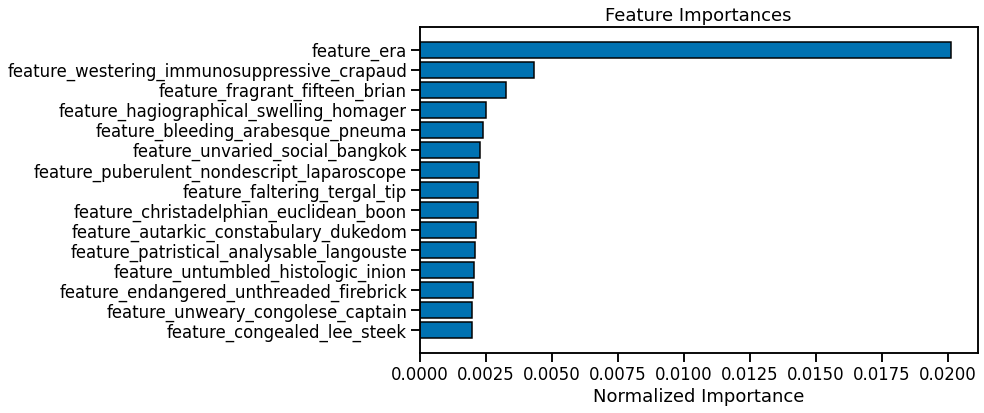

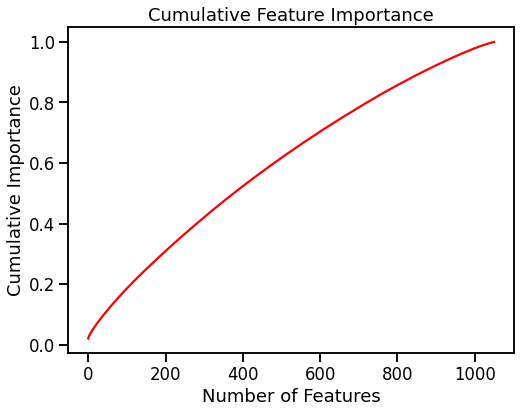

865 features required for 0.90 of cumulative importance


In [45]:
# plot feature importance LGB group
norm_feature_importances = plot_feature_importances(feature_importances)
#top3:feature_era,feature_westering_immunosuppressive_crapaud, feature_fragrant_fifteen_brian

In [46]:
#del val
#del df
del modellgb
gc.collect()

7639

In [47]:
del train_features
del train_y
del valid_features
del valid_y
gc.collect()

0

In [48]:
del norm_feature_importances
del feature_importances
gc.collect()

0

In [49]:
features = [f for f in test.columns.values.tolist() if 'feature' in f]
print('There are {} features.'.format(len(features)))

There are 945 features.


In [50]:
%%time
# LGBM again to avoid memory error DDR4 hangup, is at 84.5GB/94.2GB now
# skipped round 291 because of time
#60gb occupied, reduce to 10
print("Current date and time: ",str(datetime.datetime.now())) 
X_train = train[features].to_numpy()
y_train = train[f'target']

#selection 2
# Initialize an empty array to hold feature importances
feature_importances2 = np.zeros(X_train.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMRegressor(objective='binary', boosting_type = 'goss', n_estimators = 1000, class_weight = 'balanced')

# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=50, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances2 += model.feature_importances_
    
# Make sure to average feature importances! 
feature_importances2 = feature_importances2 / 2
feature_importances2 = pd.DataFrame({'feature': list(features), 'importance': feature_importances2}).sort_values('importance', ascending = False
)
del train_features
del train_y
del valid_features
del valid_y
gc.collect()
print("Current date and time: ",str(datetime.datetime.now())) 
#node2: cpu time 2h 48min 13s, wall time 28min 36s
#node2 ddr4: round 295 1/4 less variables no prediction logloss loss at 2500 reaches <0.20 and auc>0.85
#node2 ddr4: 1h 2-3min 22s
#node2 ddr4: 1000 estimators 6 min 26-55s
# round 296: 1000: 0.227605
#round316 node1:0.822211 0.222984 6h6min33s wall time 30min50s

Current date and time:  2022-05-16 09:00:12.737361
[200]	valid_0's auc: 0.77244	valid_0's binary_logloss: 0.244386
[400]	valid_0's auc: 0.790488	valid_0's binary_logloss: 0.237946
[600]	valid_0's auc: 0.804507	valid_0's binary_logloss: 0.232484
[800]	valid_0's auc: 0.814993	valid_0's binary_logloss: 0.227596
[1000]	valid_0's auc: 0.823547	valid_0's binary_logloss: 0.223076
[200]	valid_0's auc: 0.771659	valid_0's binary_logloss: 0.24417
[400]	valid_0's auc: 0.789406	valid_0's binary_logloss: 0.237735
[600]	valid_0's auc: 0.802459	valid_0's binary_logloss: 0.232365
[800]	valid_0's auc: 0.813325	valid_0's binary_logloss: 0.227469
[1000]	valid_0's auc: 0.822211	valid_0's binary_logloss: 0.222984
Current date and time:  2022-05-16 09:31:03.465221
CPU times: user 6h 6min 33s, sys: 1min 35s, total: 6h 8min 9s
Wall time: 30min 50s


In [51]:
%%time
# LGB feature importances
print('There are {} features.'.format(len(features)))
print('LGB feature importances:')
print(feature_importances2.feature[0:20])
#Select importance
lgbimp = 50.00 #adjust text
# Find the features with zero importance
zero_features2 = list(feature_importances2[feature_importances2['importance'] <= lgbimp]['feature'])
print('There are %d features with lower than 50.00 importance' % len(zero_features2))
feature_importances2.tail()
#node2 ddr4: round 295 at lgbimp 13 no features get dropped; at lgbimp 22 no features get dropped
#round 296: 70: 0 features dropped
#round316: 70 only 29 features left, set to 50

There are 945 features.
LGB feature importances:
0                                      feature_era
583    feature_westering_immunosuppressive_crapaud
731                 feature_fragrant_fifteen_brian
769              feature_bleeding_arabesque_pneuma
750          feature_autarkic_constabulary_dukedom
784        feature_hagiographical_swelling_homager
751         feature_christadelphian_euclidean_boon
589     feature_puberulent_nondescript_laparoscope
711       feature_patristical_analysable_langouste
368             feature_haziest_lifelike_horseback
760        feature_endangered_unthreaded_firebrick
693          feature_liege_unexercised_ennoblement
574     feature_intersubjective_juristic_sagebrush
11              feature_untumbled_histologic_inion
185                feature_unvaried_social_bangkok
125                    feature_congealed_lee_steek
631       feature_atlantic_uveal_incommunicability
198            feature_interfertile_neozoic_solder
748           feature_unstacked_t

,feature,importance
652,feature_indentured_communicant_tulipomania,16.0
776,feature_plausive_carboxyl_elaborator,15.5
792,feature_subject_shaggier_relapse,15.5
344,feature_wicker_crescent_slavocrat,13.0
210,feature_incidental_unveiled_bobbysoxer,13.0


In [52]:
#DROPS
train = train.drop(columns = zero_features2)
test = test.drop(columns = zero_features2)
val = val.drop(columns = zero_features2)
print('LGB model:')
print('Training selection 1 shape: ', train.shape)
print('Testing selection 1 shape: ', test.shape)
features = [f for f in train.columns.values.tolist() if 'feature' in f]
print('There are {} features.'.format(len(features)))
# at feature importance 20, about 200 weak features get dropped

LGB model:
Training selection 1 shape:  (2412105, 29)
Testing selection 1 shape:  (1412847, 29)
There are 7 features.


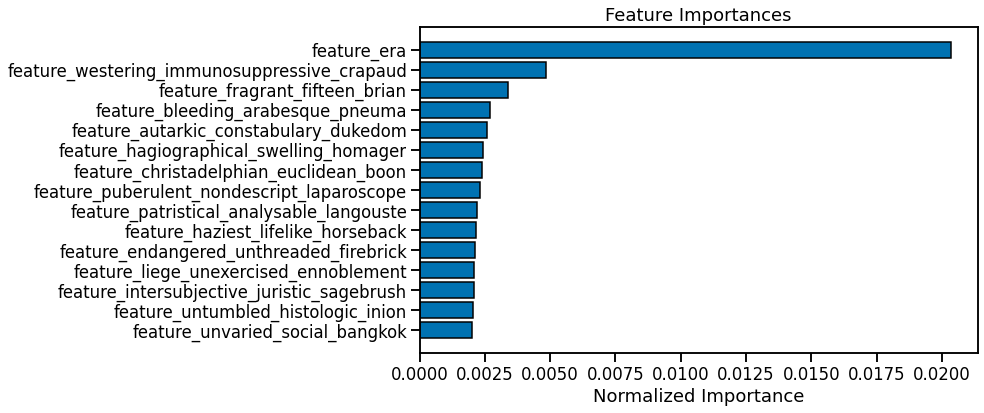

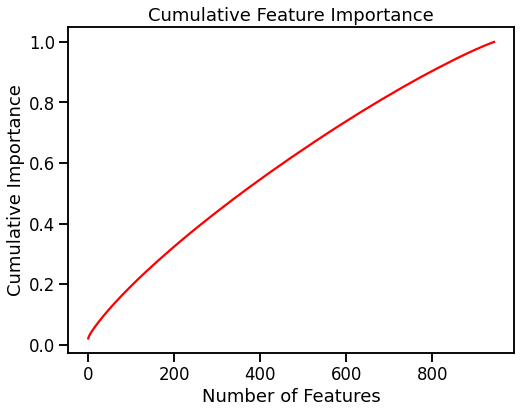

796 features required for 0.90 of cumulative importance


In [53]:
# plot feature importance LGB group 2
norm_feature_importances = plot_feature_importances(feature_importances2)

## Feature Engineering

In [54]:
group = 'feature_era'
train[group].value_counts()

0237    4896
0236    4893
0238    4886
0253    4882
0250    4879
        ... 
0010    2363
0011    2343
0003    2333
0002    2258
0001    2070
Name: feature_era, Length: 574, dtype: int64

In [55]:
%%time
#TODO: only run on ddr4 server
#TODO: make multithreading
def fe(df, features):
    """
    add basic statistics
    """
    df['features_mean'] = df[features].mean(axis=1)
    df['features_std'] = df[features].std(axis=1)
    df['features_max'] = df[features].max(axis=1)
    df['features_min'] = df[features].min(axis=1)
    df['features_mad'] = df[features].mad(axis=1)
    df['features_skew'] = df[features].skew(axis=1)
    df['features_kurt'] = df[features].kurt(axis=1)
    return df

train = fe(train, features)
test = fe(test, features)
val = fe(val, features)
# node2: 27-28min 46s
# round 296: 136->143 features 5min 10s

CPU times: user 34.2 s, sys: 331 ms, total: 34.5 s
Wall time: 33.6 s


In [56]:
features = [f for f in train.columns.values.tolist() if 'feature' in f]
print('There are {} features.'.format(len(features)))

There are 14 features.


In [57]:
%%time
X_train = train[features].to_numpy()
y_train = train[f'target']

#selection 3
# Initialize an empty array to hold feature importances
feature_importances3 = np.zeros(X_train.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMRegressor(objective='binary', boosting_type = 'goss', n_estimators = 1500, class_weight = 'balanced')

# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X_train, y_train, test_size = 0.10, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=50, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances3 += model.feature_importances_
    
# Make sure to average feature importances! 
feature_importances3 = feature_importances3 / 2
feature_importances3 = pd.DataFrame({'feature': list(features), 'importance': feature_importances3}).sort_values('importance', ascending = False
)
del train_features
del train_y
del valid_features
del valid_y
gc.collect()
#node2: 700 features, 6800 estimators: AUC: <0.9, 
#node2 ddr4: round 295 7500 estimators 75gb -> changed to 5000 for next rounds, at 7500 AUC: <0.9
#TODO: double the amount of features by engineering per alphabetical group/ correlation group
#round 296: 1400: 0.222121
#round316: 0.727783 0.2555999 using only 14 features

[200]	valid_0's auc: 0.718494	valid_0's binary_logloss: 0.261803
[400]	valid_0's auc: 0.722138	valid_0's binary_logloss: 0.260556
[600]	valid_0's auc: 0.72488	valid_0's binary_logloss: 0.259471
[800]	valid_0's auc: 0.727442	valid_0's binary_logloss: 0.258514
[1000]	valid_0's auc: 0.729685	valid_0's binary_logloss: 0.257624
[1200]	valid_0's auc: 0.731415	valid_0's binary_logloss: 0.256897
[1400]	valid_0's auc: 0.733283	valid_0's binary_logloss: 0.25606
[200]	valid_0's auc: 0.714969	valid_0's binary_logloss: 0.261776
[400]	valid_0's auc: 0.718463	valid_0's binary_logloss: 0.260395
[600]	valid_0's auc: 0.721613	valid_0's binary_logloss: 0.259272
[800]	valid_0's auc: 0.723439	valid_0's binary_logloss: 0.258302
[1000]	valid_0's auc: 0.725664	valid_0's binary_logloss: 0.257458
[1200]	valid_0's auc: 0.726674	valid_0's binary_logloss: 0.256733
[1400]	valid_0's auc: 0.727783	valid_0's binary_logloss: 0.255999


8381

In [58]:
%%time
# LGB feature importances
print('There are {} features.'.format(len(features)))
print('LGB feature importances:')
print(feature_importances3.feature[0:20])
#Select importance
lgbimp = 80.00 #adjust text
# Find the features with zero importance
zero_features3 = list(feature_importances3[feature_importances3['importance'] <= lgbimp]['feature'])
print('There are %d features with lower than 80.00 importance' % len(zero_features3))
feature_importances3.tail()

There are 14 features.
LGB feature importances:
0                                     feature_era
12                                  features_skew
7                                   features_mean
13                                  features_kurt
3           feature_autarkic_constabulary_dukedom
4          feature_christadelphian_euclidean_boon
8                                    features_std
2                  feature_fragrant_fifteen_brian
5               feature_bleeding_arabesque_pneuma
6         feature_hagiographical_swelling_homager
1     feature_westering_immunosuppressive_crapaud
11                                   features_mad
9                                    features_max
10                                   features_min
Name: feature, dtype: object
There are 0 features with lower than 80.00 importance
CPU times: user 2.31 ms, sys: 0 ns, total: 2.31 ms
Wall time: 2.08 ms


,feature,importance
6,feature_hagiographical_swelling_homager,2515.0
1,feature_westering_immunosuppressive_crapaud,2293.5
11,features_mad,1865.5
9,features_max,336.5
10,features_min,282.0


In [59]:
#DROPS
train = train.drop(columns = zero_features3)
test = test.drop(columns = zero_features3)
val = val.drop(columns = zero_features3)
print('LGB model:')
print('Training selection 1 shape: ', train.shape)
print('Testing selection 1 shape: ', test.shape)
features = [f for f in train.columns.values.tolist() if 'feature' in f]
print('There are {} features.'.format(len(features)))
# at feature importance 80, about 100/700 weak features get dropped
#round 296: 80:2 features removed

LGB model:
Training selection 1 shape:  (2412105, 36)
Testing selection 1 shape:  (1412847, 36)
There are 14 features.


In [60]:
#if any transformation is needed for XGB
train.feature_era = train.feature_era.astype(int)
test.feature_era = train.feature_era.astype(int)
val.feature_era = train.feature_era.astype(int)
print(train.dtypes)

feature_era                                      int64
data_type                                       object
feature_westering_immunosuppressive_crapaud       int8
feature_fragrant_fifteen_brian                    int8
feature_autarkic_constabulary_dukedom             int8
feature_christadelphian_euclidean_boon            int8
feature_bleeding_arabesque_pneuma                 int8
feature_hagiographical_swelling_homager           int8
target                                         float16
target_nomi_20                                 float16
target_nomi_60                                 float16
target_jerome_20                               float16
target_jerome_60                               float16
target_janet_20                                float16
target_janet_60                                float16
target_ben_20                                  float16
target_ben_60                                  float16
target_alan_20                                 float16
target_ala

In [61]:
%%time
target = 'target'
# train-valid split
train_set = {
    'X': train[features], 
    'y': train[target].astype(np.float64)
}
test_set = {
    'X': test[features], 
    'y': test[target].astype(np.float64)
}
val_set = {
    'X': val[features], 
    'y': val[target].astype(np.float64)
}

assert train_set['y'].isna().sum() == 0
assert val_set['y'].isna().sum() == 0

# Initialize an empty array to hold feature importances
feature_importances4 = np.zeros(train.shape[1])

# same parameters of the Integration-Test
import joblib
from sklearn import utils
import xgboost as xgb
import operator

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'colsample_bytree': 0.05,                 
    'learning_rate': 0.01,
    'max_depth': 5,
    'seed': 46,
    'n_estimators': 1000,
    #'tree_method': 'gpu_hist' # if you want to use GPU ... No visible gpu found, TODO: fix
}

# define 
model = xgb.XGBRegressor(**params)

# fit
model.fit(
    train_set['X'], train_set['y'], 
    eval_set=[(val_set['X'], val_set['y'])],
    verbose=100, 
    early_stopping_rounds=100,
)

# save model
joblib.dump(model, f'{CFG.OUTPUT_DIR}/xgb_model_val.pkl')
logger.info('xgb model with early stopping saved!')

# feature importance
importance = model.get_booster().get_score(importance_type='gain')
importance = sorted(importance.items(), key=operator.itemgetter(1))
feature_importances4 = pd.DataFrame(importance, columns=['features', 'importance'])
#node2: round 295 0.22356
#node2: round 296: 0.22356 2min 41s
#round316 node1: 0.22358

[0]	validation_0-rmse:0.22358
[100]	validation_0-rmse:0.22358
[182]	validation_0-rmse:0.22358


xgb model with early stopping saved!
INFO:__main__:xgb model with early stopping saved!


CPU times: user 27min 37s, sys: 1.12 s, total: 27min 38s
Wall time: 53.1 s


In [62]:
# plot feature importance XGB group 1
# LGB feature importances
#print('LGB feature importances:')
#print(feature_importances4.feature[0:20])
#norm_feature_importances = plot_feature_importances(feature_importances4)

In [63]:
tournament_data = pd.read_parquet('numerai_tournament_data.parquet', columns=['id'])
#is test tournament_data = pd.read_parquet('numerai_tournament_data.parquet')

In [64]:
models = []
models.append(model)

In [65]:
#test["feature_era"] = test["feature_era"].astype(float)
test["feature_era"] = pd.to_numeric(test["feature_era"],errors='coerce')
#test["feature_era"] = test["feature_era"].astype(float)
#print(test[features].dtypes)
#TODO: fix ValueError: could not convert string to float: 'X'

In [66]:
features = [f for f in test.columns.values.tolist() if 'feature' in f]
print('There are {} features.'.format(len(features)))

There are 14 features.


In [67]:
#batch_size=2000
tournament_preds = np.zeros((len(test), len(models)))
#
#tournament_batches = tournament_pq.iter_batches(batch_size)
#for i, batch in tqdm(enumerate(tournament_batches)):
#    features = batch.to_pandas()[features]
#    for j, model in enumerate(models):
#        tournament_preds[i*batch_size:(i+1)*batch_size, j] = model.predict(features)

tournament_preds = model.predict(test[features])
tournament_data["prediction"] = tournament_preds

#del tournament_preds

#tournament_data["prediction"] = tournament_data[model_to_submit].rank(pct=True)
tournament_data["prediction"].to_csv(f"tournament_predictions3_{current_ds}.csv")

In [68]:
# https://colab.research.google.com/drive/1ECh69C0LDCUnuyvEmNFZ51l_276nkQqo#scrollTo=tTBUzPep2dm3
#print("Current date and time: ",str(datetime.datetime.now()))
def score(df, target_name=target, pred_name='prediction'):
    '''Takes df and calculates spearm correlation from pre-defined cols'''
    # method="first" breaks ties based on order in array
    return np.corrcoef(
        df[target_name],
        df[pred_name].rank(pct=True, method="first")
    )[0,1]

def run_analytics(era_scores):
    print(f"Mean Correlation: {era_scores.mean():.4f}")
    print(f"Median Correlation: {era_scores.median():.4f}")
    print(f"Standard Deviation: {era_scores.std():.4f}")
    print('\n')
    print(f"Mean Pseudo-Sharpe: {era_scores.mean()/era_scores.std():.4f}")
    print(f"Median Pseudo-Sharpe: {era_scores.median()/era_scores.std():.4f}")
    print('\n')
    print(f'Hit Rate (% positive eras): {era_scores.apply(lambda x: np.sign(x)).value_counts()[1]/len(era_scores):.2%}')

    era_scores.rolling(10).mean().plot(kind='line', title='Rolling Per Era Correlation Mean', figsize=(15,4))
    plt.axhline(y=0.0, color="r", linestyle="--"); plt.show()

    era_scores.cumsum().plot(title='Cumulative Sum of Era Scores', figsize=(15,4))
    plt.axhline(y=0.0, color="r", linestyle="--"); plt.show()


<h2> End of LGBM prediction based on new data </h2>

In [69]:
%%time
print(tournament_data.columns)
#print(tournament_data.iloc[0:len(tournament_data),0:1052].head())
tournament_data['feature_era'] = pd.to_numeric(test['feature_era'],errors='coerce')
#tournament_data = tournament_data.rename(columns={'era':'feature_era'})
#tournament_data = tournament_data.drop(columns=['data_type'])
print(tournament_data.iloc[0:len(tournament_data),0:1051].head())
# prediction
pred = modellgb.predict(tournament_data.iloc[0:len(tournament_data),0:1050])
plt.hist(pred_MLP);
predictions_df = test["id"].to_frame()

predictions_df[PREDICTION_NAME] = pred_MLP
print(pred_MLP[0:5])
# to rank
predictions_df[PREDICTION_NAME] = predictions_df[PREDICTION_NAME].rank(pct=True, method="first")
predictions_df = predictions_df.fillna(0.5)
print(predictions_df[0:5])
# 5 minutes

Index(['prediction'], dtype='object')
                  prediction  feature_era
id                                       
n000101811a8a843    0.499973          NaN
n001e1318d5072ac    0.500880          NaN
n002a9c5ab785cbb    0.500703          NaN
n002ccf6d0e8c5ad    0.502427          NaN
n0051ab821295c29    0.499801          NaN


NameError: name 'modellgb' is not defined

In [70]:
print(features)

['feature_era', 'feature_westering_immunosuppressive_crapaud', 'feature_fragrant_fifteen_brian', 'feature_autarkic_constabulary_dukedom', 'feature_christadelphian_euclidean_boon', 'feature_bleeding_arabesque_pneuma', 'feature_hagiographical_swelling_homager', 'features_mean', 'features_std', 'features_max', 'features_min', 'features_mad', 'features_skew', 'features_kurt']


In [71]:
%%time
"""
# my default NN hyperparameters
params = {
    'input_dim': len(features),#set to featured to use interaction variables, features to use origin
    'input_dropout': 0.0,
    'hidden_layers': 3,
    'hidden_units': 256,
    'hidden_activation': 'relu',
    'lr': 1e-03,
    'dropout': 0.2,
    'batch_size': 128,
    'epochs': 3
}
logger.info('default NN params:')
logger.info(params)

def create_off(params=params):
    """
#    baseline model
    """

    # NN model architecture
    n_neuron = params['hidden_units']

    inputs = tf.keras.layers.Input(shape=(params['input_dim'], ))
    x = tf.keras.layers.BatchNormalization()(inputs)
    x = tf.keras.layers.Dense(n_neuron, activation=params['hidden_activation'])(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(params['dropout'])(x)

    # stack more layers
    for i in np.arange(params['hidden_layers'] - 1):
        x = tf.keras.layers.Dense(n_neuron // (2 * (i+1)), activation=params['hidden_activation'])(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(params['dropout'])(x)

    out = tf.keras.layers.Dense(1, activation='linear', name = 'out')(x)
        
    # compile
    model = tf.keras.models.Model(inputs=inputs, outputs=out)
    loss = tf.keras.losses.MeanSquaredError()
    opt = tf.keras.optimizers.Adam(lr=params['lr'])
    model.compile(loss=loss, optimizer=opt, metrics=['mse'])
    
    return model

def create_model(params=params):
    """
#    paper model
    """

    # NN model architecture
    n_neuron = params['hidden_units']

    inputs = tf.keras.layers.Input(shape=(params['input_dim'], ))
    x = tf.keras.layers.Dense(n_neuron, activation=params['hidden_activation'])(x) 
    x = tf.keras.layers.BatchNormalization()(inputs)
    x = tf.keras.layers.Dropout(params['dropout'])(x)    
    #x = tf.keras.layers.Dense(n_neuron, activation=params['hidden_activation'])(x)
    #x = tf.keras.layers.BatchNormalization()(x)

    # activation
    # stack more layers
    for i in np.arange(params['hidden_layers'] - 1):
        x = tf.keras.layers.Dense(n_neuron // (2 * (i+1)), activation=params['hidden_activation'])(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(params['dropout'])(x)

    out = tf.keras.layers.Dense(1, activation='linear', name = 'out')(x)
        
    # compile
    model = tf.keras.models.Model(inputs=inputs, outputs=out)
    loss = tf.keras.losses.MeanSquaredError()
    opt = tf.keras.optimizers.Adam(lr=params['lr'])
    model.compile(loss=loss, optimizer=opt, metrics=['mse'])
    
    return model

def tuning_model(hp, params=params):
    """
#    model tuning with KerasTuner
    """
    
    inputs = tf.keras.layers.Input(shape=(params['input_dim'], ))
    x = tf.keras.layers.BatchNormalization()(inputs)
    x = tf.keras.layers.Dense(hp.Int('num_units_1', 128, 512, step=128), activation=params['hidden_activation'])(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(hp.Float('dropout_1', 0.0, 0.5, step=0.1, default=0.5))(x)

    for i in range(hp.Int('num_layers', 1, 3)):
        x = tf.keras.layers.Dense(hp.Int(f'num_units_{i+2}', 128, 512, step=128))(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(hp.Float(f'dropout_{i+2}', 0.0, 0.5, step=0.1, default=0.5))(x)
        
    # output
    out = tf.keras.layers.Dense(1, activation='linear', name = 'out')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=out)
   
    # compile
    loss = tf.keras.losses.MeanSquaredError()
    opt = tf.keras.optimizers.Adam(lr=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))
    model.compile(loss=loss, optimizer=opt, metrics=['mse'])
    
    return model
"""

IndentationError: unexpected indent (<unknown>, line 20)

In [ ]:

assert train_set['y'].isna().sum() == 0
assert val_set['y'].isna().sum() == 0
assert train_set['X'].isna().sum() == 0
assert val_set['X'].isna().sum() == 0

In [ ]:
%%time
"""
# same parameters of the Integration-Test
import joblib
from sklearn import utils
import xgboost as xgb
import operator

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'colsample_bytree': 0.05,                 
    'learning_rate': 0.01,
    'max_depth': 7,
    'seed': 46,
    'n_estimators': 2500,
    #'tree_method': 'gpu_hist' # if you want to use GPU ... No visible gpu found, TODO: fix
}

# define 
model = xgb.XGBRegressor(**params)

# fit
model.fit(
    train_set['X'], train_set['y'], 
    eval_set=[(val_set['X'], val_set['y'])],
    verbose=100, 
    early_stopping_rounds=100,
)

# save model
#joblib.dump(model, f'{CFG.OUTPUT_DIR}/xgb_model_val.pkl')
# round 290: 0.21255
# node-master 10600L: 8min 53s
# ehmac 17000 no GPU: 
"""

In [ ]:
%%time
#logger.info('xgb model with early stopping saved!')

# feature importance
#importance = model.get_booster().get_score(importance_type='gain')
#importance = sorted(importance.items(), key=operator.itemgetter(1))
#feature_importance_df = pd.DataFrame(importance, columns=['features', 'importance'])
# 4 minutes with 12800; 5 minutes with 10600

In [ ]:
"""
%%time
params = {
            'n_estimators': 2500,#2000
            'objective': 'regression',
            'boosting_type': 'gbdt',
            'max_depth': 5,#5
            'learning_rate': 0.01,#0.01
            'feature_fraction': 0.1,
            'seed': 42
            }    
model_lgb = lgb.LGBMRegressor(**params)
model_lgb.fit(train_set[features], train_set['target'])
"""

In [ ]:
%%time
"""
# Set to model met interaction variables (trained_set and valed_set from above used)
#about 360 min with 108 variables on 2x Xeon e5-v2692 v2 and 120gb ddr3 ond dl360p gen8 server
if CFG.TUNING:
    # define a custom tuner to tune the batch size
    class MyTuner(kt.tuners.BayesianOptimization):
      def run_trial(self, trial, *args, **kwargs):
        # You can add additional HyperParameters for preprocessing and custom training loops
        # via overriding `run_trial`
        kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 128, 8192, step=128)
#         kwargs['epochs'] = trial.hyperparameters.Int('epochs', 10, 30)
        super(MyTuner, self).run_trial(trial, *args, **kwargs)

    # instantiate KerasTuner
    model_ft = lambda hp: tuning_model(hp, params)
    tuner = MyTuner(
        hypermodel=model_ft,
        objective=kt.Objective('val_loss', direction='min'),
        num_initial_points=4,
        max_trials=7,
        overwrite=True)
    
    # perform tuning
    tuner.search(trained_set['X'], trained_set['y'], 
                 epochs = 2, validation_data = (valed_set['X'], valed_set['y']))

    # Get the optimal hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials = 4)[0]
    
    # Build the model with the optimal hyperparameters and train it on the data
    model_MLP = tuner.hypermodel.build(best_hps)
    
    # disp best params
    logger.info('Best hyperparameters:')
    logger.info(best_hps.values)
else:
    # baseline (no tuning)
    model_MLP = create_model(params)
# 23 minutes on server per 30 trials
# 3.3 minutes per trial
# 45 minutes per 20 trials
# 254 minutes per 70 trials
# 410 minutes per 70 trials on 10600 ddr3

#TODO reduce time to learn using GPU
#TODO compare model with XGBoost and LGBM
#TODO enable to input learned hyperparameters as starting point (enable learning)
#LEARNING = True
"""

In [ ]:
target = 'target'
drops = ['data_type', target]
features = [f for f in train.columns.values.tolist() if f not in drops]

logger.info('{:,} features: {}'.format(len(features), features))

In [ ]:
%%time
# Data Cleaning
"""

trained_set = {'X': feature_df[features].values, 'y': feature_df[CFG.TARGET].values}
valed_set = {'X': feature_df.query('data_type == "validation"')[features].values, 'y': feature_df.query('data_type == "validation"')[features][CFG.TARGET].values}  
"""

In [ ]:
"""
%%time
# Make a custom metric function for TPOT
# Root mean squared logarithmic error is how Kaggle scores this task
# Can't use custom scorer with n_jobs > 1.  Known issue.

def custom_rmsle(y_true, y_pred):
     return np.sqrt(np.mean((np.log(1 + y_pred) - np.log(1 + y_true))**2))

# Make a custom scorer from the custom metric function
rmsle = make_scorer(custom_rmsle, greater_is_better=False)

# Number of pipelines is very small below so that we can quickly commit on Kaggle
# parameters http://epistasislab.github.io/tpot/using/

# instantiate tpot 
tpot = TPOTRegressor(verbosity=2,  
                    random_state=55, 
                    scoring=rmsle,
                    periodic_checkpoint_folder="intermediate_results",
                    n_jobs=-1, 
                    warm_start = True,
                    generations=30, 
                    population_size=2,
                    early_stop=7,
                    #config_dict='TPOT NN'
                    )
times = []
scores = []
winning_pipes = []

# run 2 iterations
for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_ames.py')

# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)
# export the best model
tpot.export('tpot_develuse_best_model.py')
"""

In [ ]:
"""
%%time
# same parameters of the Integration-Test
import joblib
from sklearn import utils
import xgboost as xgb
import operator

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'colsample_bytree': 0.05,                 
    'learning_rate': 0.01,
    'max_depth': 7,
    'seed': 46,
    'n_estimators': 2500,
    'tree_method': 'gpu_hist' # if you want to use GPU ... No visible gpu found, TODO: fix
}

# define 
model = xgb.XGBRegressor(**params)

# fit
model.fit(
    train_set['X'], train_set['y'], 
    eval_set=[(val_set['X'], val_set['y'])],
    verbose=100, 
    early_stopping_rounds=100,
)

# save model
joblib.dump(model, f'{CFG.OUTPUT_DIR}/xgb_model_val.pkl')
logger.info('xgb model with early stopping saved!')

# feature importance
importance = model.get_booster().get_score(importance_type='gain')
importance = sorted(importance.items(), key=operator.itemgetter(1))
feature_importance_df = pd.DataFrame(importance, columns=['features', 'importance'])
# 4 minutes with 12800; 5 minutes with 10600
"""

In [ ]:
%%time
# feature importance
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(
    x='importance', 
    y='features', 
    data=feature_importance_df.sort_values(by='importance', ascending=False)[0:20],
    ax=ax
)

Looks like 'price gap the moving average' kinds of features are good signals!

# Validation Score
The following snipets are derived from 

https://colab.research.google.com/drive/1ECh69C0LDCUnuyvEmNFZ51l_276nkQqo#scrollTo=tTBUzPep2dm3

Let's see how good our model predictions on the validation data are.

In [ ]:
# https://colab.research.google.com/drive/1ECh69C0LDCUnuyvEmNFZ51l_276nkQqo#scrollTo=tTBUzPep2dm3
#print("Current date and time: ",str(datetime.datetime.now()))
def score(df, target_name=target, pred_name='prediction'):
    '''Takes df and calculates spearm correlation from pre-defined cols'''
    # method="first" breaks ties based on order in array
    return np.corrcoef(
        df[target_name],
        df[pred_name].rank(pct=True, method="first")
    )[0,1]

def run_analytics(era_scores):
    print(f"Mean Correlation: {era_scores.mean():.4f}")
    print(f"Median Correlation: {era_scores.median():.4f}")
    print(f"Standard Deviation: {era_scores.std():.4f}")
    print('\n')
    print(f"Mean Pseudo-Sharpe: {era_scores.mean()/era_scores.std():.4f}")
    print(f"Median Pseudo-Sharpe: {era_scores.median()/era_scores.std():.4f}")
    print('\n')
    print(f'Hit Rate (% positive eras): {era_scores.apply(lambda x: np.sign(x)).value_counts()[1]/len(era_scores):.2%}')

    era_scores.rolling(10).mean().plot(kind='line', title='Rolling Per Era Correlation Mean', figsize=(15,4))
    plt.axhline(y=0.0, color="r", linestyle="--"); plt.show()

    era_scores.cumsum().plot(title='Cumulative Sum of Era Scores', figsize=(15,4))
    plt.axhline(y=0.0, color="r", linestyle="--"); plt.show()
%%time
#prediction for the validation set
valid_sub = feature_df.query('data_type == "validation"')[drops].copy()
valid_sub['prediction'] = model.predict(val_set['X'])

# compute score
val_era_scores = valid_sub.copy()
val_era_scores['friday_date'] = val_era_scores['friday_date'].astype(str)
val_era_scores = val_era_scores.loc[val_era_scores['prediction'].isna() == False].groupby(['friday_date']).apply(score)
run_analytics(val_era_scores)

In [ ]:
%%time
#prediction for the validation set
valid_sub = feature_df.query('data_type == "validation"')[drops].copy()
valid_sub['prediction'] = model.predict(val_set['X'])

# compute score
val_era_scores = valid_sub.copy()
val_era_scores['friday_date'] = val_era_scores['friday_date'].astype(str)
val_era_scores = val_era_scores.loc[val_era_scores['prediction'].isna() == False].groupby(['friday_date']).apply(score)
run_analytics(val_era_scores)

# to beat

# round 290

Mean Correlation: 0.0149

Median Correlation: 0.0114

Standard Deviation: 0.0453

Mean Pseudo-Sharpe: 0.3296

Median Pseudo-Sharpe: 0.2523

Hit Rate (% positive eras): 59.63%

#round 279

Mean Correlation: 0.0127

Median Correlation: 0.0126

Standard Deviation: 0.0401

Mean Pseudo-Sharpe: 0.3170

Median Pseudo-Sharpe: 0.3156


Hit Rate (% positive eras): 62.57%

#Round 278

Validation_0-rmse:0.21323

Mean Correlation: 0.0132

Median Correlation: 0.0152

Standard Deviation: 0.0416

Mean Pseudo-Sharpe: 0.3167

Median Pseudo-Sharpe: 0.3653

Hit Rate (% positive eras): 63.90%


Round 276

Mean Correlation: 0.0127

Median Correlation: 0.0131

Standard Deviation: 0.0408

Mean Pseudo-Sharpe: 0.3114

Median Pseudo-Sharpe: 0.3197

Hit Rate (% positive eras): 62.83%

Round 287

Mean Correlation: 0.0136

Median Correlation: 0.0092

Standard Deviation: 0.0409

Mean Pseudo-Sharpe: 0.3328

Median Pseudo-Sharpe: 0.2248

Hit Rate (% positive eras): 60.43%

Round 289

Mean Correlation: 0.0149

Median Correlation: 0.0123

Standard Deviation: 0.0393

Mean Pseudo-Sharpe: 0.3797

Median Pseudo-Sharpe: 0.3131

Hit Rate (% positive eras): 59.63%

Well, I guess it is fairly good as a starter, isn't it?

# Submission
Let's use this trained model to make a submission for the Numerai Signals.

Note that, again, yfinance data is not complete. Sometimes there is no recent data available for many tickers;(

We need at least 5 tickers for a successful submission. Let's first check if we have at least 5 tickers in which the recent friday_date for them is indeed the recent friday date.

In [ ]:
from datetime import datetime
# recent friday date?
recent_friday = datetime.now() + relativedelta(weekday=FR(-1))
recent_friday = int(recent_friday.strftime('%Y%m%d'))
print(f'Most recent Friday: {recent_friday}')

In [ ]:
%%time
# in case no recent friday is available...prep the second last
recent_friday2 = datetime.now() + relativedelta(weekday=FR(-2))
recent_friday2 = int(recent_friday2.strftime('%Y%m%d'))
print(f'Second most recent Friday: {recent_friday2}')

In [ ]:
%%time
# do we have at least 5 tickers, whose the latest date matches the recent friday?
ticker_date_df = feature_df.groupby('ticker')['friday_date'].max().reset_index()
if len(ticker_date_df.loc[ticker_date_df['friday_date'] == recent_friday]) >= 5:
    ticker_date_df = ticker_date_df.loc[ticker_date_df['friday_date'] == recent_friday]
else: # use dates later than the second last friday
    ticker_date_df = ticker_date_df.loc[ticker_date_df['friday_date'] == recent_friday2]
    recent_friday = recent_friday2
    
print(len(ticker_date_df))
ticker_date_df

Good! That's fairly enough. So we only perform the inference on those tickers and submit!

In [ ]:
%%time
# live sub
feature_df.loc[feature_df['friday_date'] == recent_friday, 'data_type'] = 'live'
test_sub = feature_df.query('data_type == "live"')[drops].copy()
test_sub['prediction'] = model.predict(feature_df.query('data_type == "live"')[features])

logger.info(test_sub.shape)
test_sub.head()

In [ ]:
%%time
# histogram of prediction
#print("Current date and time: ",str(datetime.datetime.now()))
test_sub['prediction'].hist(bins=100)

Let's submit! What is good with the Numerai Signals is that if you submit your predictions on the validation data, on the website, you can get more information about your model performance such as APY.

In [ ]:
# To submit, you need to have Numerai account and have API's id and secret key. Also you need to have at least one (numerai signals') model slot.
def submit_signal(sub: pd.DataFrame, public_id: str, secret_key: str, slot_name: str):
    """
    submit numerai signals prediction
    """
    # setup private API
    napi = numerapi.SignalsAPI(public_id, secret_key)
    
    # write predictions to csv
    model_id = napi.get_models()[f'{slot_name}']
    filename = f"sub_{model_id}.csv"
    sub.to_csv(filename, index=False)
    
    # submit
    submission = napi.upload_predictions(filename, model_id=model_id)
    print(f'Submitted : {slot_name}!')
    
# concat valid and test 
sub = pd.concat([valid_sub, test_sub], ignore_index=True)

# rename to 'signal'
sub.rename(columns={'prediction': 'signal'}, inplace=True)

# select necessary columns
sub = sub[['ticker', 'friday_date', 'data_type', 'signal']]

public_id = '<Your Numerai API ID>'
secret_key = '<Your Numerai Secret Key>'
slot_name = '<Your Numerai Signals Submission Slot Name>'
# submit_signal(sub, public_id, secret_key, slot_name) # uncomment if you submit

# save 
sub.to_csv(f'../{current_ds}_submission_sdf_{today}.csv', index=False)

In [ ]:
sub.head()

In [ ]:
%%time
sub.tail()

sub.to_parquet('sub.parquet')
# make spark dataframe (dfs)
sdf_sub = spark.read.parquet('sub.parquet')
# Merge EDS to close_volume
sdf_sub_eq = sdf_sub.join(EDS_eq,sdf_sub.ticker ==  EDS_eq.bloomberg_ticker,"left")
sdf_sub_eq.show(truncate=False)
# Select Signal with SEDOL
cols = ['bloomberg_ticker','friday_date','signal','data_type']
sdf_sub_eq.select(*cols).show()
sdf_sub_sedol = sdf_sub_eq.select(*cols)
sdf_sub_sedol = sdf_sub_sedol.dropDuplicates()#.withColumnRenamed("ticker", "bloomberg_ticker")
sdf_sub_sedol.show(truncate=False)
# Make pandas sub_sedol dataframe
sdf_sub_sedol.write.parquet('sub_sedol8.parquet')
sub_sedol = pd.read_parquet('sub_sedol8.parquet')


In [ ]:
%%time
# save 
sub_sedol.to_csv(f'{CFG.OUTPUT_DIR}/{current_ds}_submission_{today}_sedol.csv', index=False)